<a href="https://colab.research.google.com/github/johntango/Cert3/blob/main/GradientDesc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# New Section




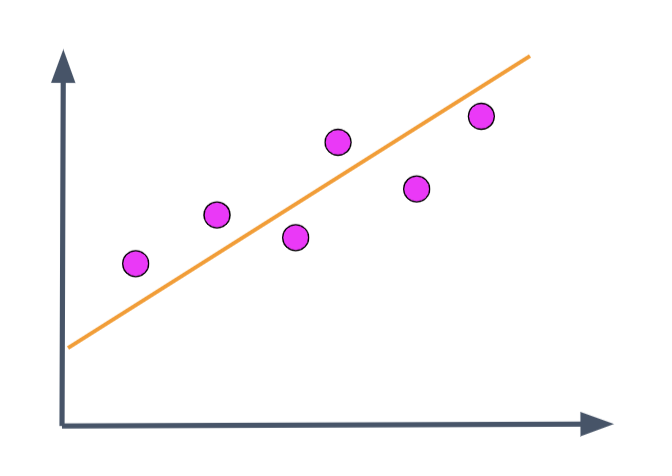

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import time

def gradient_descent(max_iterations,threshold,w_init,
                     obj_func,grad_func,extra_param = [],
                     learning_rate=0.05,momentum=0.8):
    
    w = w_init
    w_history = w
    f_history = ofunc(w,xy)
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0e10
    
    while  i<max_iterations and diff>threshold:
        delta_w = -learning_rate*grad_func(w) + momentum*delta_w
        w = w+delta_w
        
        # store the history of w and f
        w_history = np.vstack((w_history,w))
        f_history = np.vstack((f_history,obj_func(w,xy)))
        
        # update iteration number and diff between successive values
        # of objective function
        i+=1
        diff = np.absolute(f_history[-1]-f_history[-2])
    
    return w_history,f_history
def grad_mse(w,xy):
    (x,y) = xy
    (rows,cols) = x.shape
    
    # Compute the output
    ypredicted = np.sum(x*w,axis=1)
    diff = y - ypredictd
    diff = diff.reshape((rows,1))    
    diff = np.tile(diff, (1, cols))
    grad = diff*x
    grad = -np.sum(grad,axis=0)
    return grad

# Input argument is weight and a tuple (train_data, target)
def mse(w,xy):
    (x,y) = xy
    # Compute output
    # keep in mind that wer're using mse and not mse/m
    # because it would be relevant to the end result
    ypredicted = np.sum(x*w,axis=1)
    mse = np.sum((y - ypredicted)*(y - ypredicted))
    mse = mse/2
    return mse    
def ofunc(w,xy):
  (x,y) = xy
  return  w[0] + w[1]*x

w_init = np.array([1,1])
x = 2 * np.random.rand(10,1)
y = 4 +3 * x+np.random.randn(10,1)
xy = zip(x,y)
for i in range(10): 
  w_hist, f_hist = gradient_descent(5,-1,w_init, ofunc ,grad_mse,[],learning_rate=0.05,momentum=0.8)
  print(f'W: {w_hist}')
  print(f'function: {f_hist}')
  ind = ind+1
  plt.text(-9, 12,'Learning Rate = '+str(eta),fontsize=13)
  if col==1:
      plt.text(10,15,'momentum = ' + str(alpha),fontsize=20)








ValueError: ignored

In [ ]:
from matplotlib.pyplot as plt
import numpy as np

npoints = 100
nslice = 10
x = np.arange(0, npoints, 1)
w = [3,2].    # [w0, w1]
k = 0.001

noise = np.random.rand(npoints)
wLast = [0,1]

y = x*w + noise + b   # generaty y and add noise

# keep track of gradient descent
wHist = []
bHist = []


def get_slice(x, y, n):
    start = np.random.randint(0, npoints)
    return x[start:start+n], y[start:start+n]


def get_gradient_w(w_gradient, b, x, y):
    diff = 2*(y - w_gradient*x - b)
    #print(f" diff: {diff}")
    n = len(x)
    delta_w = np.sum(diff*x)
    # print(delta_w)
    w_gradient = w_gradient + k*delta_w/n
    return w_gradient


for i in range(10):
    x_slice, y_slice = get_slice(x, y, nslice)

    wLast = get_gradient_w(wLast, bLast, x_slice, y_slice)
    bLast = get_gradient_b(wLast, bLast, x_slice, y_slice)
    wHist.append(wLast)
    bHist.append(bLast)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(np.arange(len(wHist)), wHist, c='b', marker='o')
ax.plot(np.arange(len(bHist)), bHist, c='r', marker='x')


ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

##plt.plot(x, ys, '-')
#plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()
